<a href="https://colab.research.google.com/github/Harssin/MNIST_DataProcessing/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### What is MNIST?  
  
- Set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau  
- All the images are labeled with the respective digit they represent  
- There are 70,000 images and each image has 784 features  
- Each image is <b>28x28</b> pixels, and each feature simply represents one pixels'x intensity, from 0(white) to 255(black).

#### Importing Libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
%matplotlib inline

#### Fetching the hand written digit dataset

In [ ]:
mnist = fetch_openml('mnist_784')

#### Gathering information about the MNIST dataset

In [ ]:
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

In [ ]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


#### MNIST Data  
It contains features or pixels (28*28= 784) of 70,000 image of digits


In [ ]:
print(type(mnist.data))
print(mnist.data)

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### MNIST Target

In [ ]:
print(type(mnist.target))
print(mnist.target)

<class 'numpy.ndarray'>
['5' '0' '4' ... '4' '5' '6']


#### Preparing Dataset

In [ ]:
x,y = mnist['data'],mnist['target']

In [ ]:
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


##### Converting the 'data' into a 'dataframe' and the 'target' into series

In [ ]:
x = pd.DataFrame(x)
y = pd.Series(y)

In [ ]:
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:


print(x.shape,y.shape)

(70000, 784) (70000,)


#### Selecting Random 20 images from MNIST dataset

In [ ]:
p = np.random.permutation(len(x))
print(type(p))
print(len(p))
print(p)
print(p.min())
print(p.max())
# Now p contains integers from 0 to 70000 randomly in the nd array p

#selecting first 20 elements from p
p = p[:20]

<class 'numpy.ndarray'>
70000
[67321 48791 60169 ... 54967 36874 52197]
0
69999


In [ ]:
pixels_of_images = x.loc[p].values
labels_of_images =y.loc[p].values

print(type(x.loc[p]))
print(type(y.loc[p]))

print(type(pixels_of_images),pixels_of_images.shape,len(pixels_of_images))
print(type(labels_of_images),labels_of_images.shape,len(labels_of_images))

print(labels_of_images.dtype)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> (20, 784) 20
<class 'numpy.ndarray'> (20,) 20
object


In [ ]:
print(labels_of_images)

['2' '0' '4' '0' '3' '3' '3' '3' '2' '4' '6' '4' '5' '1' '8' '9' '3' '9'
 '7' '1']


#### Image Plotting Function

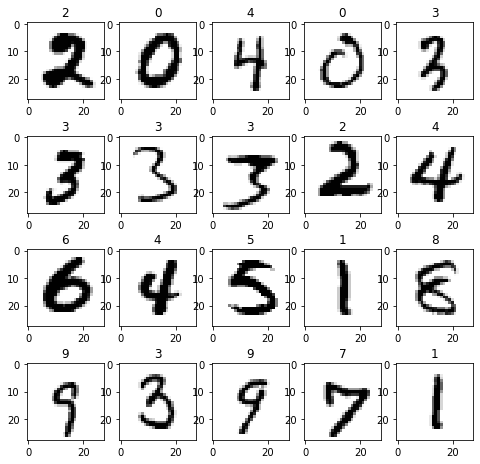

In [ ]:
def plot_images(images,labels):
    n_cols = min(5,len(images))
    n_rows = len(images)//n_cols
    fig=plt.figure(figsize=(8,8))

    for i in range(n_rows*n_cols):
        sp =fig.add_subplot(n_rows , n_cols,i+1)
        #plt.axis("off")
        plt.imshow(images[i],cmap= matplotlib.cm.binary,interpolation = "nearest")
        sp.set_title(labels[i])
    plt.show()
plot_images(pixels_of_images.reshape(-1,28,28),labels_of_images)

#### Preparing Training and Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.1)

print(train_x.shape,test_x.shape)

(63000, 784) (7000, 784)


#### Training the Model

In [ ]:
from sklearn.svm import SVC
SVC_classifier = SVC()
SVC_classifier.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Checking the efficiency of the model

In [ ]:
SVC_classifier.score(test_x,test_y)

0.9818571428571429

In [ ]:
#from sklearn.metrics import classification_report
#predictions = SVC_classifier.predict(test_x)
#print(classification_report(test_y,predictions))

#### Saving the Model

In [ ]:
import joblib

In [ ]:
joblib.dump(SVC_classifier, 'SVC_classifier')

['SVC_classifier']

#### Loading the Model

In [ ]:
SVC_classifier = joblib.load('SVC_classifier')

#### Defining a function to make the user select the image and predict the output

The given MNIST dataset contains of 70000 images of numbers. 
Out of which we have divided images from 0 to 62999 for training and images from 63000 to 69999 for testing.

Select the image number from the MNIST dataset (0 to 69999)
6828


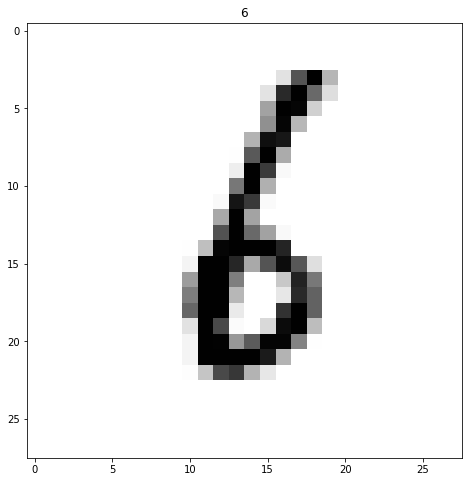

Predicted Value : ['6']
Labeled Value : 6


In [ ]:
def user_select_from_MNIST():
    # Total Images in MNIST dataset
    # Training Images = 0 - 62999
    # Testing Images = 63000 - 69999
    print("The given MNIST dataset contains of 70000 images of numbers. \nOut of which we have divided images from 0 to 62999 for training and images from 63000 to 69999 for testing.\n")
    sel = int(input("Select the image number from the MNIST dataset (0 to 69999)\n"))
    if sel<0 or sel>69999:
        print("You have selected in invalid image which is not in MNIST dataset")
        return None
    else:
        a = x.loc[sel]
        a = a.to_numpy()    # Converting from DataFrame to ndarray object
        plot_images(a.reshape(-1,28,28),SVC_classifier.predict([a]))
        print("Predicted Value : {}".format(SVC_classifier.predict([a])))
        print("Labeled Value : {}".format(y.loc[sel]))   

user_select_from_MNIST()